## 1. Setup

In [1]:
import sys
sys.path.append('../..')

In [2]:
import albumentations as A
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings

from annotations import *
from density_maps import create_and_save_density_maps
from utils.data.data_ops import move_val_split_to_train
from utils.input_output.io import save_np_arrays, load_np_arrays, load_images
from utils.input_output.io import save_gt_counts, load_gt_counts

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

warnings.filterwarnings('ignore')

## 2. VGG Cells Dataset

In [4]:
DATASET_PATH = '../../datasets/vgg_cells'
TRAIN_PATH = f'{DATASET_PATH}/train'
TRAIN_IMG_PATH = f'{TRAIN_PATH}/images'
TRAIN_GT_DOTS_PATH = f'{TRAIN_PATH}/gt_dots'
TRAIN_GT_COUNTS_PATH = f'{TRAIN_PATH}/gt_counts'
TRAIN_GT_DENSITY_MAPS_PATH = f'{TRAIN_PATH}/gt_density_maps'

VAL_PATH = f'{DATASET_PATH}/val'

TEST_PATH = f'{DATASET_PATH}/test'
TEST_IMG_PATH = f'{TEST_PATH}/images'
TEST_GT_DOTS_PATH = f'{TEST_PATH}/gt_dots'
TEST_GT_COUNTS_PATH = f'{TEST_PATH}/gt_counts'
TEST_GT_DENSITY_MAPS_PATH = f'{TEST_PATH}/gt_density_maps'

In [5]:
#move_val_split_to_train(VAL_PATH, TRAIN_PATH)

In [6]:
'''
!rm -rf $TRAIN_GT_DENSITY_MAPS_PATH
!rm -rf $TRAIN_GT_COUNTS_PATH
!rm -rf $TEST_GT_DENSITY_MAPS_PATH
!rm -rf $TEST_GT_COUNTS_PATH

!mkdir $TRAIN_GT_DENSITY_MAPS_PATH
!mkdir $TRAIN_GT_COUNTS_PATH
!mkdir $TEST_GT_DENSITY_MAPS_PATH
!mkdir $TEST_GT_COUNTS_PATH
'''

'\n!rm -rf $TRAIN_GT_DENSITY_MAPS_PATH\n!rm -rf $TRAIN_GT_COUNTS_PATH\n!rm -rf $TEST_GT_DENSITY_MAPS_PATH\n!rm -rf $TEST_GT_COUNTS_PATH\n\n!mkdir $TRAIN_GT_DENSITY_MAPS_PATH\n!mkdir $TRAIN_GT_COUNTS_PATH\n!mkdir $TEST_GT_DENSITY_MAPS_PATH\n!mkdir $TEST_GT_COUNTS_PATH\n'

In [7]:
print(DATASET_PATH)
print(os.listdir(DATASET_PATH))

../../datasets/vgg_cells
['test', 'train', 'val']


In [8]:
print(TRAIN_PATH)
print(os.listdir(TRAIN_PATH))

../../datasets/vgg_cells/train
['gt_counts', 'gt_density_maps', 'gt_dots', 'images']


In [9]:
train_img_names = sorted(os.listdir(TRAIN_IMG_PATH))
train_dots_names = sorted(os.listdir(TRAIN_GT_DOTS_PATH))
test_img_names = sorted(os.listdir(TEST_IMG_PATH))
test_dots_names = sorted(os.listdir(TEST_GT_DOTS_PATH))

print(f'train split: {len(train_img_names)} images')
print(train_img_names[:3])
print(train_dots_names[:3])

print(f'\ntest split: {len(test_img_names)} images')
print(test_img_names[:3])
print(test_dots_names[:3])

train split: 64 images
['001cell.png', '002cell.png', '003cell.png']
['001dots.png', '002dots.png', '003dots.png']

test split: 100 images
['101cell.png', '102cell.png', '103cell.png']
['101dots.png', '102dots.png', '103dots.png']


In [10]:
train_dots_names = sorted(os.listdir(TRAIN_GT_DOTS_PATH))
test_dots_names = sorted(os.listdir(TEST_GT_DOTS_PATH))

print(TRAIN_GT_DOTS_PATH)
print(train_dots_names[:5])

print(TEST_GT_DOTS_PATH)
print(test_dots_names[:5])

../../datasets/vgg_cells/train/gt_dots
['001dots.png', '002dots.png', '003dots.png', '004dots.png', '006dots.png']
../../datasets/vgg_cells/test/gt_dots
['101dots.png', '102dots.png', '103dots.png', '104dots.png', '105dots.png']


#### Load dots images (.png)

In [11]:
'''
train_dots_images = load_dots_images(TRAIN_GT_DOTS_PATH, train_dots_names)
test_dots_images = load_dots_images(TEST_GT_DOTS_PATH, test_dots_names)

print(len(train_dots_images), train_dots_images[0].shape, train_dots_images[0].dtype,
      train_dots_images[0].min(), train_dots_images[0].max(), train_dots_images[0].sum())
'''

'\ntrain_dots_images = load_dots_images(TRAIN_GT_DOTS_PATH, train_dots_names)\ntest_dots_images = load_dots_images(TEST_GT_DOTS_PATH, test_dots_names)\n\nprint(len(train_dots_images), train_dots_images[0].shape, train_dots_images[0].dtype,\n      train_dots_images[0].min(), train_dots_images[0].max(), train_dots_images[0].sum())\n'

#### Save gt counts (from dots images)

In [12]:
#train_counts = dots_images_to_counts(train_dots_images)
#test_counts = dots_images_to_counts(test_dots_images)

In [13]:
#save_gt_counts(train_counts, train_dots_names, TRAIN_GT_COUNTS_PATH)
#save_gt_counts(test_counts, test_dots_names, TEST_GT_COUNTS_PATH)

#### Create and save density maps (.npy)

In [14]:
#create_and_save_density_maps(train_dots_images, config.VGG_CELLS_SIGMA,
#                             train_img_names, TRAIN_GT_DENSITY_MAPS_PATH)
#create_and_save_density_maps(test_dots_images, config.VGG_CELLS_SIGMA,
#                             test_img_names, TEST_GT_DENSITY_MAPS_PATH)

#### Load some train images and density maps

In [15]:
train_images = load_images(TRAIN_IMG_PATH, train_img_names, num_images=3)
print(len(train_images))
print(train_images[0].dtype)

3
float64


In [16]:
train_gt_density_maps = load_np_arrays(TRAIN_GT_DENSITY_MAPS_PATH, num=3)
print(len(train_gt_density_maps))
print(train_gt_density_maps.dtype)

3
float64


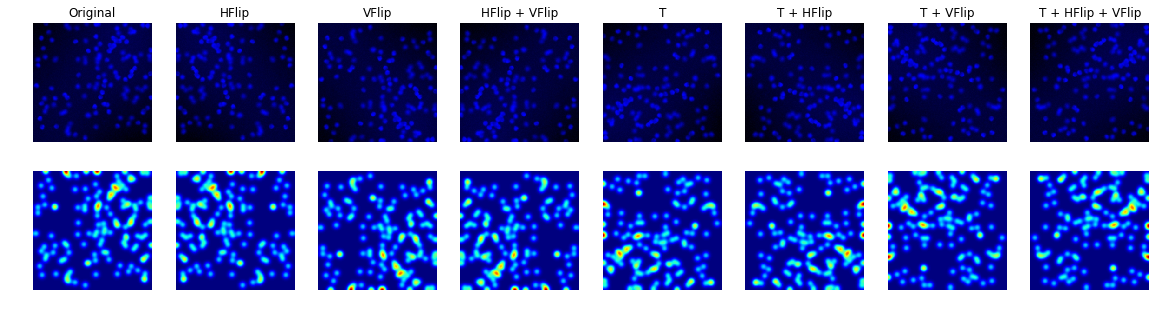

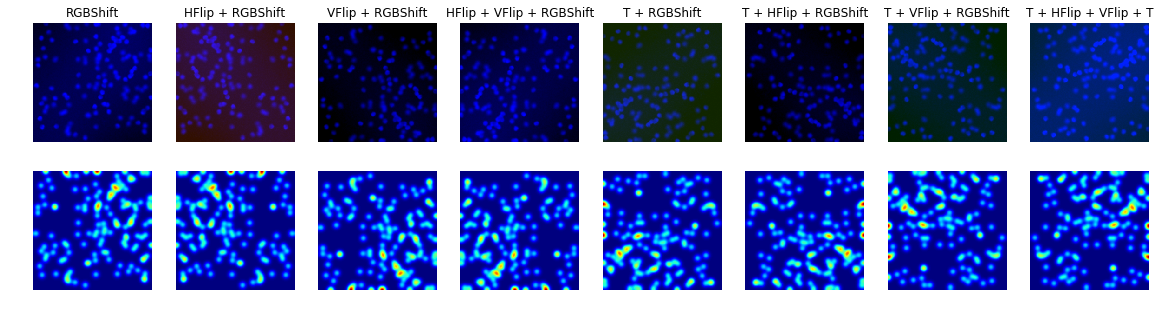

In [18]:
for i in range(1):
    img = train_images[i]
    mask = train_gt_density_maps[i]
    img_name = train_img_names[i]
    
    augmented = A.HorizontalFlip(p=1)(image=img, mask=mask)
    img_hf, mask_hf = augmented['image'], augmented['mask']
    
    augmented = A.VerticalFlip(p=1)(image=img, mask=mask)
    img_vf, mask_vf = augmented['image'], augmented['mask']
    
    augmented = A.VerticalFlip(p=1)(image=img_hf, mask=mask_hf)
    img_hf_vf, mask_hf_vf = augmented['image'], augmented['mask']
    
    augmented = A.Transpose(p=1)(image=img, mask=mask)
    img_t, mask_t = augmented['image'], augmented['mask']
    
    augmented = A.HorizontalFlip(p=1)(image=img_t, mask=mask_t)
    img_t_hf, mask_t_hf = augmented['image'], augmented['mask']

    augmented = A.VerticalFlip(p=1)(image=img_t, mask=mask_t)
    img_t_vf, mask_t_vf = augmented['image'], augmented['mask']
    
    augmented = A.VerticalFlip(p=1)(image=img_t_hf, mask=mask_t_hf)
    img_t_hf_vf, mask_t_hf_vf = augmented['image'], augmented['mask']
    
    num = 8
    plt.figure(figsize=(20, 5))
    
    plt.subplot(2, num, 1)
    plt.title('Original')
    plt.axis('off')
    plt.imshow(img)
    
    plt.subplot(2, num, num + 1)
    plt.axis('off')
    plt.imshow(mask, cmap='jet')
    
    plt.subplot(2, num, 2)
    plt.title('HFlip')
    plt.axis('off')
    plt.imshow(img_hf)
    
    plt.subplot(2, num, num + 2)
    plt.axis('off')
    plt.imshow(mask_hf, cmap='jet')
    
    plt.subplot(2, num, 3)
    plt.title('VFlip')
    plt.axis('off')
    plt.imshow(img_vf)
    
    plt.subplot(2, num, num + 3)
    plt.axis('off')
    plt.imshow(mask_vf, cmap='jet')
    
    plt.subplot(2, num, 4)
    plt.title('HFlip + VFlip')
    plt.axis('off')
    plt.imshow(img_hf_vf)
    
    plt.subplot(2, num, num + 4)
    plt.axis('off')
    plt.imshow(mask_hf_vf, cmap='jet')
    
    plt.subplot(2, num, 5)
    plt.title('T')
    plt.axis('off')
    plt.imshow(img_t)
    
    plt.subplot(2, num, num + 5)
    plt.axis('off')
    plt.imshow(mask_t, cmap='jet')
    
    plt.subplot(2, num, 6)
    plt.title('T + HFlip')
    plt.axis('off')
    plt.imshow(img_t_hf)
    
    plt.subplot(2, num, num + 6)
    plt.axis('off')
    plt.imshow(mask_t_hf, cmap='jet')
    
    plt.subplot(2, num, 7)
    plt.title('T + VFlip')
    plt.axis('off')
    plt.imshow(img_t_vf)
    
    plt.subplot(2, num, num + 7)
    plt.axis('off')
    plt.imshow(mask_t_vf, cmap='jet')
    
    plt.subplot(2, num, 8)
    plt.title('T + HFlip + VFlip')
    plt.axis('off')
    plt.imshow(img_t_hf_vf)
    
    plt.subplot(2, num, num + 8)
    plt.axis('off')
    plt.imshow(mask_t_hf_vf, cmap='jet')
    
    ### rgb shift op
    rgb_shift_op = A.RGBShift(always_apply=True,
                              r_shift_limit=0.2, 
                              g_shift_limit=0.2,
                              b_shift_limit=0.2,
                              p=1)
    
    img_rgb, mask_rgb = rgb_shift_op(image=img)['image'].clip(0, 1), mask.copy()
    img_hf_rgb, mask_hf_rgb = rgb_shift_op(image=img_hf)['image'].clip(0, 1), mask_hf.copy()
    img_vf_rgb, mask_vf_rgb = rgb_shift_op(image=img_vf)['image'].clip(0, 1), mask_vf.copy()
    img_hf_vf_rgb, mask_hf_vf_rgb = rgb_shift_op(image=img_hf_vf)['image'].clip(0, 1), mask_hf_vf.copy()
    img_t_rgb, mask_t_rgb = rgb_shift_op(image=img_t)['image'].clip(0, 1), mask_t.copy()
    img_t_hf_rgb, mask_t_hf_rgb = rgb_shift_op(image=img_t_hf)['image'].clip(0, 1), mask_t_hf.copy()
    img_t_vf_rgb, mask_t_vf_rgb = rgb_shift_op(image=img_t_vf)['image'].clip(0, 1), mask_t_vf.copy()
    img_t_hf_vf_rgb, mask_t_hf_vf_rgb = rgb_shift_op(image=img_t_hf_vf)['image'].clip(0, 1), mask_t_hf_vf.copy()
    
    num = 8
    plt.figure(figsize=(20, 5))
    
    plt.subplot(2, num, 1)
    plt.title('RGBShift')
    plt.axis('off')
    plt.imshow(img_rgb)
    
    plt.subplot(2, num, num + 1)
    plt.axis('off')
    plt.imshow(mask_rgb, cmap='jet')
    
    plt.subplot(2, num, 2)
    plt.title('HFlip + RGBShift')
    plt.axis('off')
    plt.imshow(img_hf_rgb)
    
    plt.subplot(2, num, num + 2)
    plt.axis('off')
    plt.imshow(mask_hf_rgb, cmap='jet')
    
    plt.subplot(2, num, 3)
    plt.title('VFlip + RGBShift')
    plt.axis('off')
    plt.imshow(img_vf_rgb)
    
    plt.subplot(2, num, num + 3)
    plt.axis('off')
    plt.imshow(mask_vf_rgb, cmap='jet')
    
    plt.subplot(2, num, 4)
    plt.title('HFlip + VFlip + RGBShift')
    plt.axis('off')
    plt.imshow(img_hf_vf_rgb)
    
    plt.subplot(2, num, num + 4)
    plt.axis('off')
    plt.imshow(mask_hf_vf_rgb, cmap='jet')
    
    plt.subplot(2, num, 5)
    plt.title('T + RGBShift')
    plt.axis('off')
    plt.imshow(img_t_rgb)
    
    plt.subplot(2, num, num + 5)
    plt.axis('off')
    plt.imshow(mask_t_rgb, cmap='jet')
    
    plt.subplot(2, num, 6)
    plt.title('T + HFlip + RGBShift')
    plt.axis('off')
    plt.imshow(img_t_hf_rgb)
    
    plt.subplot(2, num, num + 6)
    plt.axis('off')
    plt.imshow(mask_t_hf_rgb, cmap='jet')
    
    plt.subplot(2, num, 7)
    plt.title('T + VFlip + RGBShift')
    plt.axis('off')
    plt.imshow(img_t_vf_rgb)
    
    plt.subplot(2, num, num + 7)
    plt.axis('off')
    plt.imshow(mask_t_vf_rgb, cmap='jet')
    
    plt.subplot(2, num, 8)
    plt.title('T + HFlip + VFlip + T')
    plt.axis('off')
    plt.imshow(img_t_hf_vf_rgb)
    
    plt.subplot(2, num, num + 8)
    plt.axis('off')
    plt.imshow(mask_t_hf_vf_rgb, cmap='jet')